<a href="https://colab.research.google.com/github/desean2394/IT7103-Fall-2024/blob/main/Project_Cdavi445_IT7103.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dataset Head:
    user_id        date     weight      height  blood_glucose  \
0        1  2021-01-01  77.450712  183.993554     112.992869   
1        2  2021-01-02  67.926035  179.246337     134.219253   
2        3  2021-01-03  79.715328  170.596304     108.303203   
3        4  2021-01-04  92.845448  163.530632     127.681539   
4        5  2021-01-05  66.487699  176.982233      70.000000   

   physical_activity  diet  medication_adherence  stress_level  sleep_hours  \
0           0.000000     1                     0             1     6.342317   
1          12.792300     0                     1             2    10.658122   
2          21.727889     1                     1             0     5.997832   
3          67.753753     1                     0             1     7.958814   
4          41.131062     1                     1             0     6.774707   

   hydration_level   bmi  risk_score  
0                1  22.9   38.000000  
1                1  21.1   39.162310  
2       

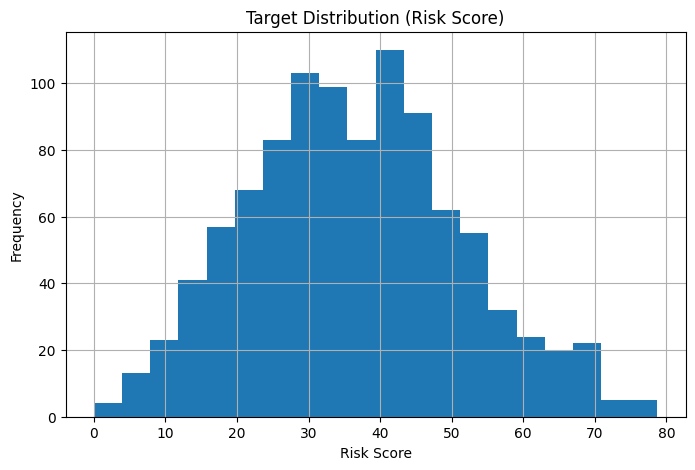

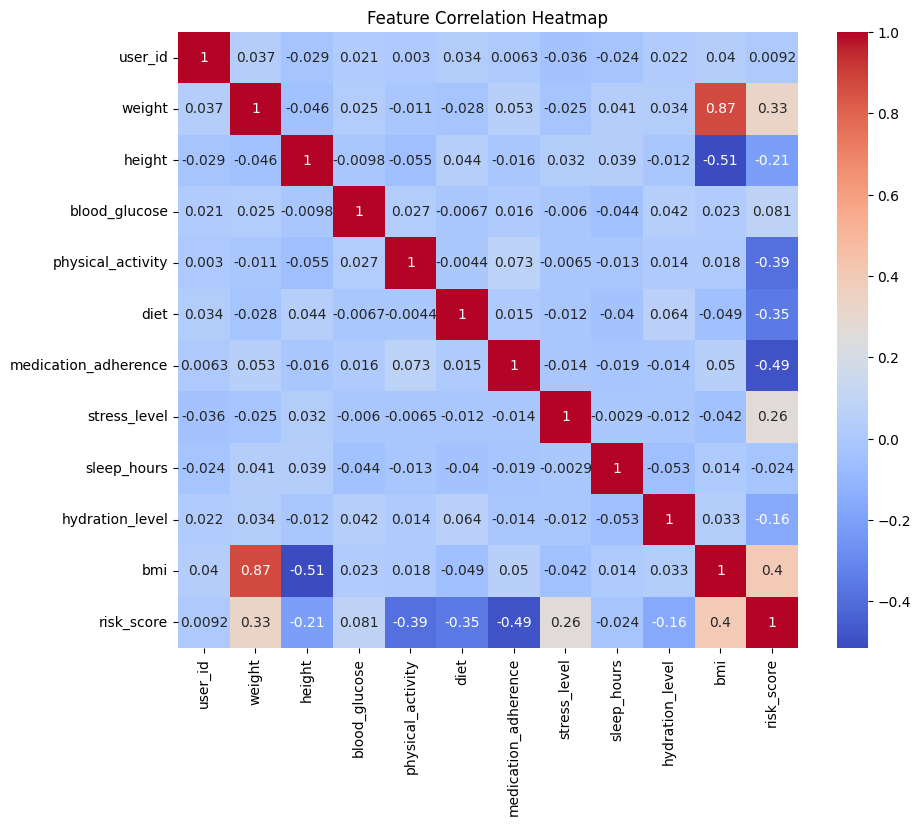


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85       106
           1       0.82      0.86      0.84        94

    accuracy                           0.84       200
   macro avg       0.84      0.85      0.84       200
weighted avg       0.85      0.84      0.85       200


Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.80      0.82       106
           1       0.79      0.83      0.81        94

    accuracy                           0.81       200
   macro avg       0.81      0.82      0.81       200
weighted avg       0.82      0.81      0.82       200


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.84      0.87       106
           1       0.83      0.90      0.87        94

    accuracy                           0.87       200
   ma

<Figure size 1000x600 with 0 Axes>

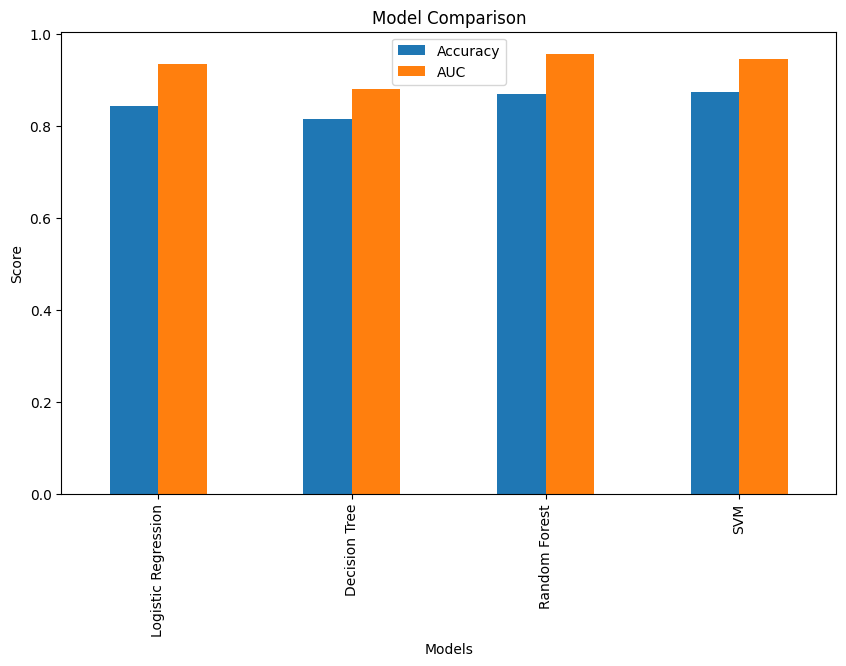

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve
from imblearn.over_sampling import SMOTE

# Load Dataset
dataset_path = "/content/drive/MyDrive/Colab Notebooks/diabetes_data.csv"  # Replace with the path to your dataset
data = pd.read_csv(dataset_path)

# Exploratory Data Analysis
print("Dataset Head:\n", data.head())
print("\nDataset Info:\n")
data.info()
print("\nSummary Statistics:\n", data.describe())

# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:\n", missing_values)

# Visualizations
plt.figure(figsize=(8, 5))
data['risk_score'].hist(bins=20)
plt.title('Target Distribution (Risk Score)')
plt.xlabel('Risk Score')
plt.ylabel('Frequency')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
numeric_data = data.select_dtypes(include=[np.number])  # Select only numeric columns
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Preprocessing
# Handle missing values
numeric_cols = data.select_dtypes(include=[np.number]).columns  # Select only numeric columns
imputer = SimpleImputer(strategy='median')
data[numeric_cols] = imputer.fit_transform(data[numeric_cols])

# Address class imbalance (if risk_score needs classification, binarize it)
# Drop the non-numeric 'date' column for modeling
X = data.drop(['risk_score', 'date'], axis=1)  # Remove 'date' and 'risk_score' from features
y = (data['risk_score'] > data['risk_score'].median()).astype(int)  # Binarize for classification

# Apply SMOTE to balance class distribution
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Feature scaling
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Model Training and Evaluation
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    'SVM': SVC(kernel='rbf', C=1, gamma=0.1, probability=True)
}

results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    results.append({'Model': model_name, 'Accuracy': acc, 'AUC': auc})

    print(f"\n{model_name} Classification Report:\n", classification_report(y_test, y_pred))

# Results Comparison
results_df = pd.DataFrame(results)
print("\nModel Performance:\n", results_df)

# Visualization of Results
plt.figure(figsize=(10, 6))
results_df.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title('Model Comparison')
plt.ylabel('Score')
plt.xlabel('Models')
plt.show()